# Panorama des bibliothèques pour la dataviz avec Python

## 1. Remarques préalables

Ce document, quelque peu expérimental, vise à dresser un panorama des différentes bibliothèques Python pour la **visualisation de données**. Il s'organise sous la forme d'une quasi liste de course qui tente de cerner les cas d'usages propres à chaque bibliothèque et d'en identifier potentiellement quelques unes qui peuvent se distinguer du lot.

Il ne s'agira pas d'explorer ici d'autres bibliothèques sur lesquelles il est quasiment impossible de faire l'impasse lorsqu'on souhaite manipuler et visualiser des données. La liste peut être alongée, mais à minima, elle compte :
* [`numpy`](https://numpy.org/) : bibliothèque destinée au calcul numérique optimisé
* [`pandas`](https://pandas.pydata.org/) : bibliothèque destinée à la manipulation de données tabulaires

## 2. Mise en forme des données

In [1]:
import pandas as pd
import numpy as np

Nous travaillerons ici à partir de deux jeux de données relativement simple à explorer et prendre en main. Il est possible de les télécharger directement [ici](https://www.data.gouv.fr/fr/datasets/liste-et-localisation-des-musees-de-france/) et [ici](https://www.data.gouv.fr/fr/datasets/frequentation-des-musees-de-france-1/).

Dans un premier temps, nous allons simplement ouvrir les fichiers CSV à l'aide de `pandas`.

In [2]:
df_freq = pd.read_csv("data/frequentations.csv", sep=";")
df_musees = pd.read_csv("data/musees.csv", sep=";")

Pour notre travail, nous allons exclure un certain nombre de colonnes de ces tableaux qui ne nous intéresserons pas.

In [3]:
df_freq.drop(columns=[
    "date_appellation",
    "note",
    "commentaire",
    "id_museofile",
    "observations",
    "regions",
    "ville",
    "nomdep"
], inplace=True)

df_musees.drop(columns=[
    "cp",
    "telephone1",
    "fax",
    "fermeture_annuelle",
    "periode_ouverture",
    "jours_nocturnes",
    "date_appellation",
    "date_retrait_appellation_par_haut_conseil"
], inplace=True)

On peut rapidement visualiser les deux premières lignes de chaque fichier que l'on vient d'ouvrir et d'élaguer. Pour la suite de notre travail, nous récupérerons donc souvent les données à partir de ces deux variables `df_freq` (qui contient les données de fréquentation des musées) et `df_musees` (qui contient les métadonnées associées à chaque musée).

In [4]:
df_freq.head(2)

,ref_musee,nom_du_musee,annee,payant,gratuit,total
0,8109902,Muséum d'histoire naturelle Philadelphe Thomas,2009,789.0,3683.0,4472.0
1,8109903,Musée de l'Abbaye Saint-Michel,2009,2613.0,669.0,3282.0


In [5]:
df_musees.head(2)

,nom_du_musee,ref_musee,adr,ville,sitweb,region,departement,coordonnees_finales
0,Musée de la Résistance et de la Déportation de...,0126901,"3, Montée de l'Abbaye",NANTUA,www.musees.ain.fr,AUVERGNE-RHÔNE-ALPES,AIN,"46.152378,5.608744"
1,Musée des Manufactures de Dentelles,4316201,"14, avenue de la Gare",RETOURNAC,www.ville-retournac.fr/musee,AUVERGNE-RHÔNE-ALPES,HAUTE-LOIRE,"45.202545,4.035302"


## 3. Quelques éléments méthodologiques et pratiques

Il existe de nombreux ouvrages, de nombreuses règles ou principes de sémiologie graphique qu'il est souvent utile d'avoir à l'esprit pour réaliser des graphiques lisibles, pertinents et honnêtes (dans le sens où ils ne cherchent pas à tromper leur public).

Ici, je propose de m'appuyer sur l'article de Nicolas Rougier, [*"Tne simple rules for better figures"* (2014)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) car il aborde ces questions souvent rebattues pour les poser du point de vue du praticien, de celui qui, face à son outil informatique de visualisation de données préféré, doit effectuer des choix (celui de l'outil dans un premier temps) pour traduire le propos qu'il souhaite véhiculer à travers l'analyse et l'interprétation graphique d'un jeu de données spécifique.

Je tente ici d'en résumer, sous forme de liste, les points qui me paraissent les plus importants au regard de notre exploration des bibliothèques pour la visualisation de données avec Python :
* Quel est notre message ?
* Quel est notre public ?
* Il faut adapter le graphique à son support de communication
* Il ne faut pas se limiter aux paramètres par défaut de l'outil

## 4. Approche brutale avec Autoviz

### 4. 1. Présentation de l'outil

`AutoViz` est une bibliothèque de visualisation de données Python qui permet de réaliser toute une batterie de visualisation de données automatiques à partir de n'importe quel jeu de données.

L'**approche est néanmoins vraiment brutale** puisqu'elle consiste à s'appuyer, à la fois sur le **typage des colonnes** mais aussi sur un **modèle d'apprentissage statistique** pour adapter les sorties visuelles aux motifs identifiés dans chaque colonne et aux relations entre les colonnes elles-mêmes pour tenter de réaliser les visualisations les plus pertinentes pour chaque cas.

Cela nécessite donc, au préalable, d'effectuer ce travail de typage rigoureux et de comprendre les tests automatiques (XGBoost) réalisés par la bibliothèque pour l'exploiter au mieux.

`Autoviz` est vraiment tournée vers la pratique de la **science des données** (*data science*) et en particulier l'idée d'identifier des **motifs spécifiques dans de grands jeux de données**. 

### 4. 2. Documentation

On peut retrouver toute la documentation à [cette adresse](https://github.com/AutoViML/AutoViz). A cela peut-on ajouter [cet article](https://towardsdatascience.com/autoviz-a-new-tool-for-automated-visualization-ec9c1744a6ad) qui détaille la philosophie de l'outil.

### 4. 3. En somme

* Prêt à l'emploi
* Orienté *data science*
* Utile pour les grands jeux de données
* Visualiser plus pour l'interprétation et la phase de recherche que pour la communication de résultats
* Peu d'options de paramétrage (automatique, comme son nom l'indique)
* N'est pas adapté à tous les jeux de données

In [6]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (22447, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  3
    14 Predictors classified...
        This does not include the Target column(s)
        9 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


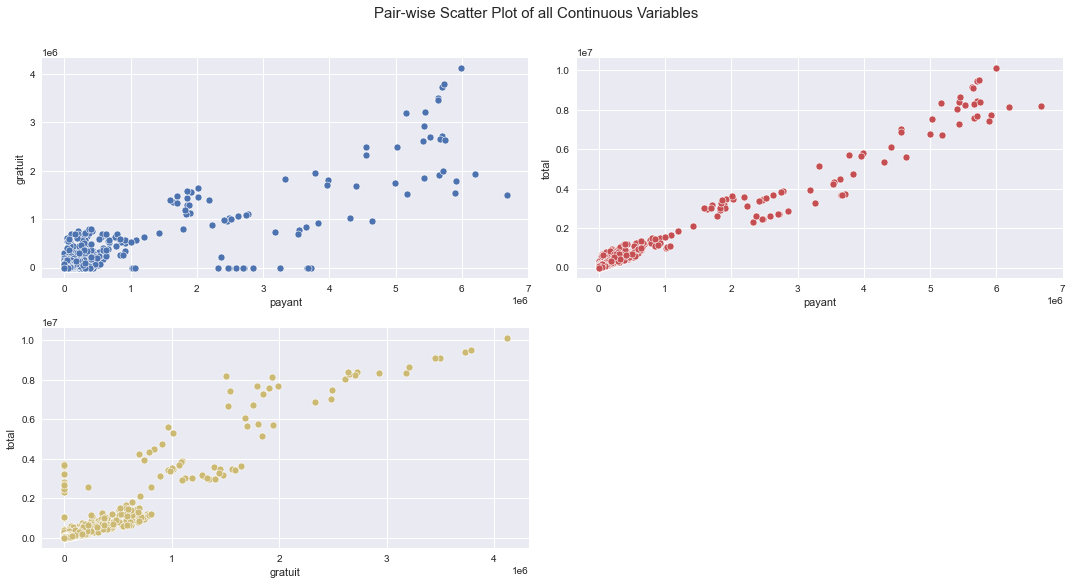

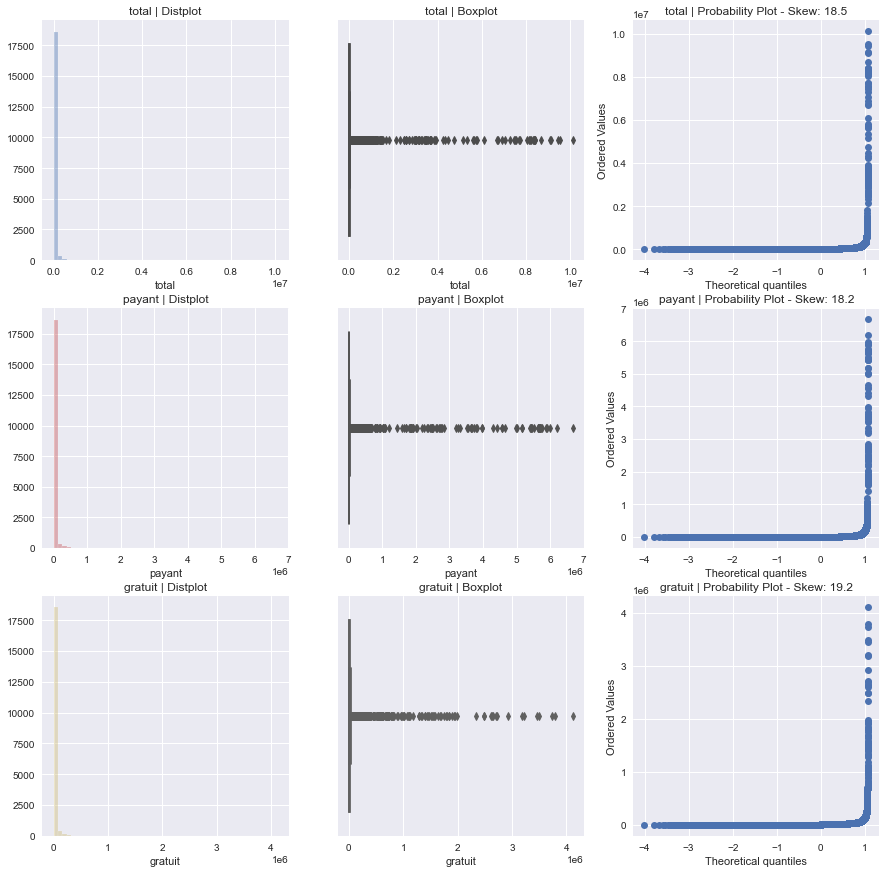

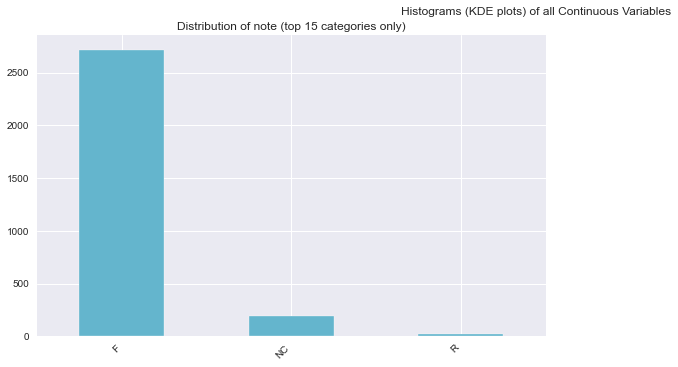

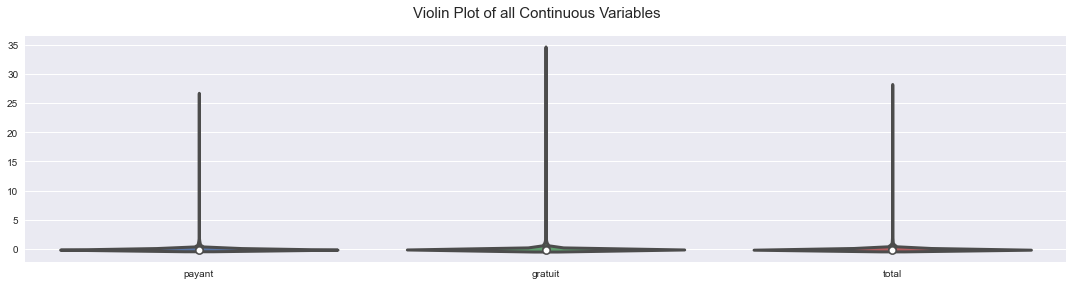

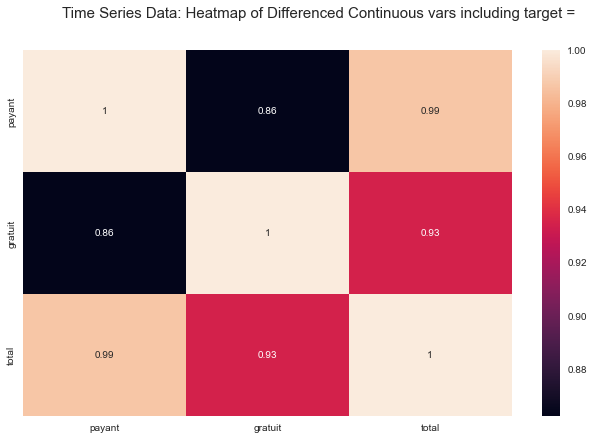

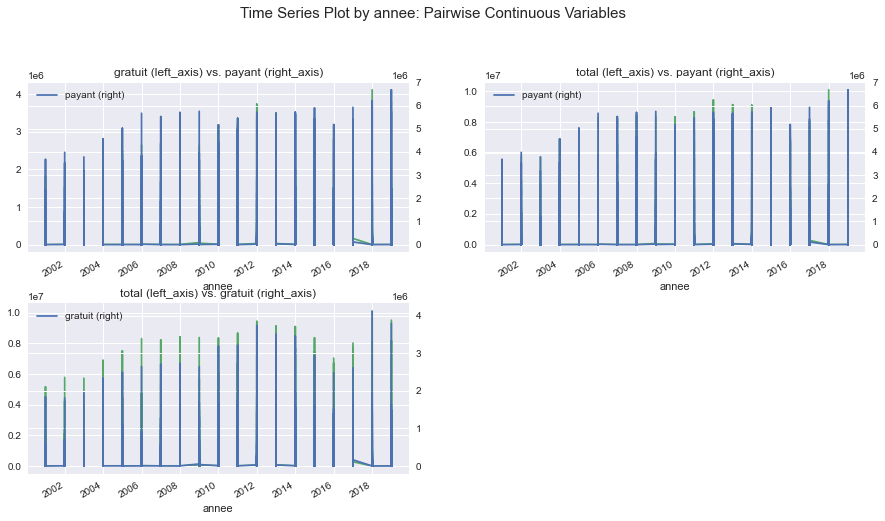

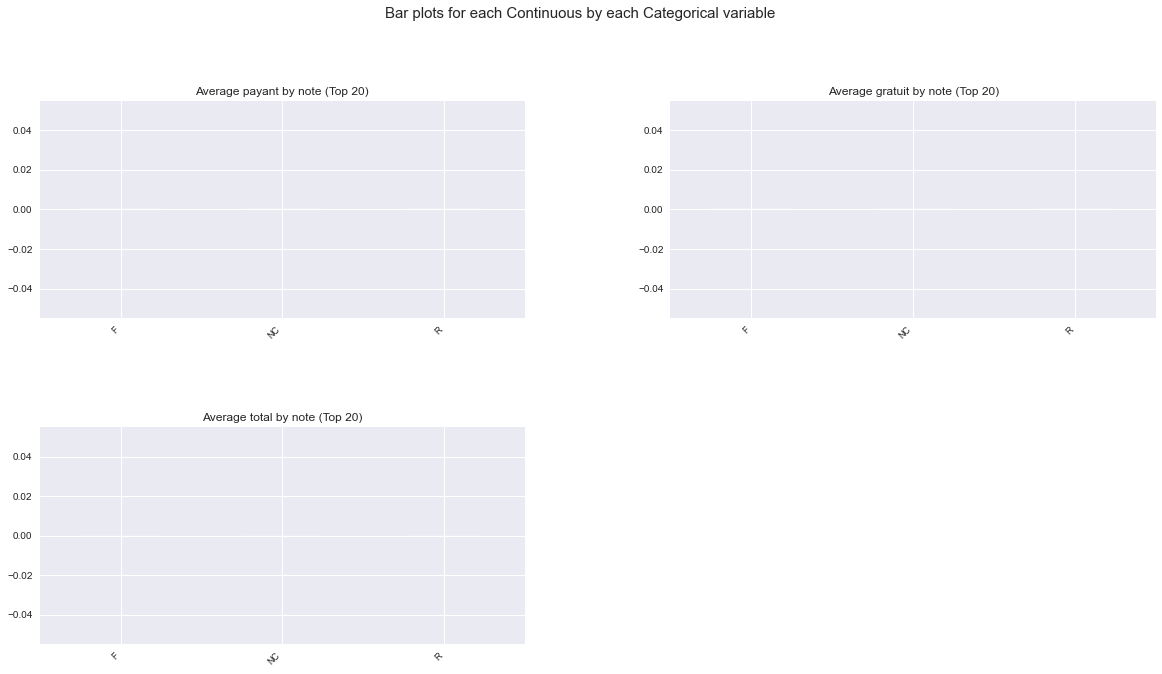

Time to run AutoViz (in seconds) = 13.992

 ###################### VISUALIZATION Completed ########################


In [7]:
AV = AutoViz_Class()
dft = AV.AutoViz(
    filename="data/frequentations.csv",
    sep=";",
    chart_format="svg"
)

## 5. La bibliothèque classique : Matplotlib

### 5. 1. Présentation de l'outil

`Matplotlib` s'appuie sur **deux philosophies sous-jacentes** qui permettent d'interagir avec la bibliothèque :
- L'approche **orientée objet** : il s'agit ici de créer explicitement les objets qui décrivent le graphique et d'appeler les méthodes de l'objet pour y ajouter les données et les éléments de légende
- L'approche **pyplot** : plus interactive, cette approche est plus simple et plus rapide et permet de prototyper rapidement des représentations graphiques

#### 5. 1. 1. Approche orientée objet

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Après avoir importé les bibliothèques nécessaires à la manipulation de nos données, affichons rapidement leur contenu pour en garder une trame générale en tête.

In [9]:
df_freq.head(2)

,ref_musee,nom_du_musee,annee,payant,gratuit,total
0,8109902,Muséum d'histoire naturelle Philadelphe Thomas,2009,789.0,3683.0,4472.0
1,8109903,Musée de l'Abbaye Saint-Michel,2009,2613.0,669.0,3282.0


In [10]:
df_musees.head(2)

,nom_du_musee,ref_musee,adr,ville,sitweb,region,departement,coordonnees_finales
0,Musée de la Résistance et de la Déportation de...,0126901,"3, Montée de l'Abbaye",NANTUA,www.musees.ain.fr,AUVERGNE-RHÔNE-ALPES,AIN,"46.152378,5.608744"
1,Musée des Manufactures de Dentelles,4316201,"14, avenue de la Gare",RETOURNAC,www.ville-retournac.fr/musee,AUVERGNE-RHÔNE-ALPES,HAUTE-LOIRE,"45.202545,4.035302"


Dans un premier temps, nous allons simplement afficher le nombre de musées par ville pour tenter de cerner comment se structure la répartition géographique des musées en France.

In [11]:
nb_musees_ville = df_musees["ville"].value_counts().head(5)
# .head() permet de récupérer les premiers éléments du tableau
nom_musees_ville = nb_musees_ville.index
# .index permet de récupérer la colonne d'en-tête du tableau

On peut afficher le contenu des variables que l'on vient de créer.

In [12]:
nb_musees_ville

PARIS         51
MARSEILLE     15
NICE          11
STRASBOURG    10
LYON          10
Name: ville, dtype: int64

In [13]:
nom_musees_ville

Index(['PARIS', 'MARSEILLE', 'NICE', 'STRASBOURG', 'LYON'], dtype='object')

Ici, on peut appeler explicitement la méthode de l'objet `pyplot` `.subplots()` qui permet de créer un couple **figure/axe** qui sont les deux "atomes" de `Matplotlib`.

L'objet `axes` de `Matplotlib` est celui qui représente une **fenêtre** qui contient un graphique. L'objet `figure` de `Matplotlib` contient, quant à lui, un nombre arbitraire de `axes` que l'on peut évidemment définir. Dans notre cas présent, nous allons simplement créer une `figure` qui contiendra un `axes`.

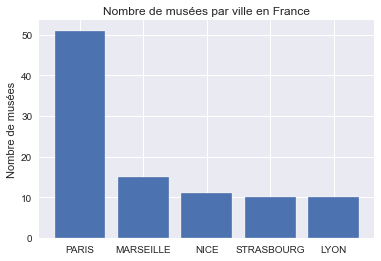

In [14]:
fig, ax = plt.subplots()
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.set_ylabel("Nombre de musées")
ax.set_title("Nombre de musées par ville en France");

Ici, nous avons utilisé la méthode `.bar()` de l'objet `pyplot` qui nous permet de créer automatique un **diagramme en bâtons**. On peut trouver ici [l'intégralité des paramètres](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar) qu'il est possible de passer à cette méthode pour adapter le résultat que l'on souhaite obtenir.

<div role="alert" class="alert alert-success">A noter au passage un léger détail, on peut ajouter `;` à la dernière méthode de notre bloc de code pour que `Matplotlib` n'affiche pas les détails de l'objet `pyplot` que l'on a créé en construisant notre graphique.</div>

#### 5. 1. 2. Approche pyplot

`Matplotlib` permet également de créer directement les graphiques sans se soucier de l'imbrication possible des `axes` et du paramétrage plus fin des `figures`.

Ainsi, lorsqu'on souhaite prototyper rapidement et visualiser des résultats pour soi, on peut aller très vite et produire un résultat en une seule ligne.

<BarContainer object of 5 artists>

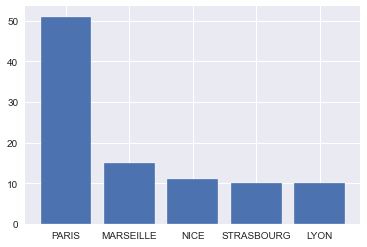

In [15]:
plt.bar(x=nom_musees_ville, height=nb_musees_ville)

Si on le souhaite, on peut très bien également adapter son graphique en passant des options supplémentaires : dans ce cas, on travaillera directement avec l'objet `pyplot`.

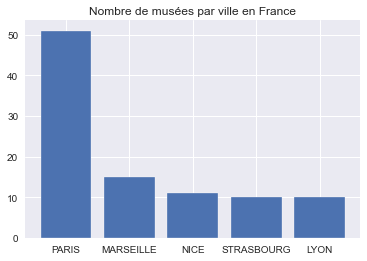

In [16]:
plt.bar(x=nom_musees_ville, height=nb_musees_ville)
plt.title("Nombre de musées par ville en France");

### 5. 2. Améliorer le premier jet

Conformément aux principes méthodologiques et pratiques que nous avons posé en préambule, prenons le temps de retravailler le résultat de ce premier jet en s'interrogeant :
1. Sur la question du message que l'on souhaite transmettre
2. Sur la pertinence des options par défaut
3. Sur le support auquel notre graphique pourrait s'adapter

#### 5. 2. 1. Quel est notre message ?

A première vue, en s'arrêtant au top 5 des villes françaises comptant le plus de musées, le message paraît assez clair : Paris domine de loin le classement et c'est ce sur quoi on voudrait insister à travers notre graphique.

En s'arrêtant rapidement sur les chiffres, on voit que la différence est de l'ordre de 1 à 5 : en additionnant le nombre de musées dans les quatre autres villes du top 5, on arrive pas à égaliser le nombre de musées que compte Paris.

En définitive, le message est assez simple et en ce sens, on peut identifier certains éléments que l'on peut modifier sur notre graphique :
* Retirer la grille de fond
* Retirer la couleur grise du fond qui n'apporte rien en terme de lisibilité ou de message

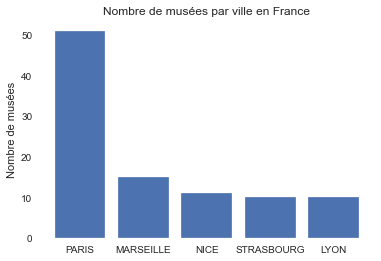

In [17]:
fig, ax = plt.subplots()
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid() # Retire la grille de fond
ax.set_facecolor("white") # Change la couleur de fond pour la définir en blanc
ax.set_ylabel("Nombre de musées")
ax.set_title("Nombre de musées par ville en France");

#### 5. 2. 2. Ne pas se limiter aux paramètres par défaut

Le deuxième point important lorsqu'on travaille avec des bibliothèques de visualisation de données qui embarquent toute une série de présupposés, d'éléments préconstruits, consiste à apprendre à s'en abstraire lorsque c'est nécessaire et explorer leur documentation pour personnaliser les rendus de nos graphiques en fonction de notre message, notre public, notre support.

Ici, la police est un peu en retrait, le titre est un peu petit par rapport aux autres éléments de légende et on pourrait certainement améliorer certaines choses en passant des paramètres complémentaires à nos fonctions qui permettent de construire le graphique.

Par ailleurs, le rendu visuel n'est pas forcément très propre : on peut voir certains pixels de certains éléments textuels de la légende, ce qui, au-delà du côté esthétique, rend aussi la lecture moins confortable.

Dans un premier temps, on peut tout d'abord essayer de hiérarchiser les éléments de légende de notre graphique.

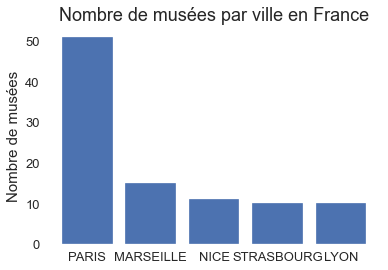

In [18]:
fig, ax = plt.subplots()
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13) # On modifie la taille des labels des villes
ax.tick_params(axis="y", labelsize=13) # On modifie la taille des labels de l'échelle des ordonnées
ax.set_ylabel("Nombre de musées", fontsize=15) # On modifie la taille du titre des ordonnées
ax.set_title("Nombre de musées par ville en France", fontsize=18); # Même chose pour le titre du graphique

En plus cela, on peut également ajouter du "poids" au texte en les passant en gras ou en italique, par exemple.

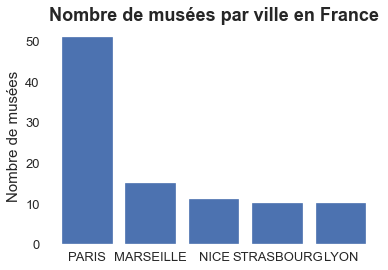

In [19]:
fig, ax = plt.subplots()
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_ylabel("Nombre de musées", fontsize=15)
ax.set_title("Nombre de musées par ville en France", fontsize=18, fontweight="bold");
# Même chose pour le titre du graphique

Ensuite, on pourrait simplement produire un graphique un plus grand : pour cela, on peut modifier le paramètre de la méthode `.subplots()`.

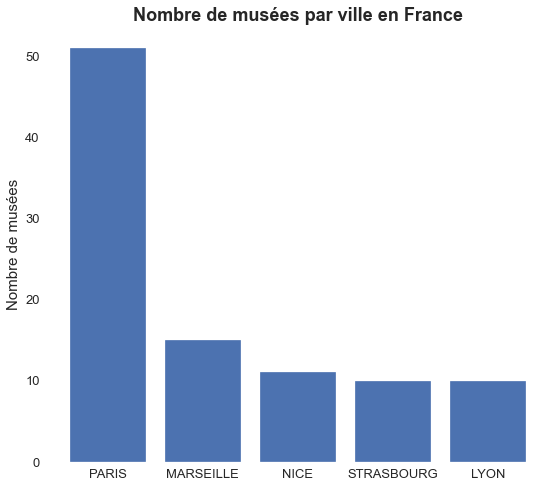

In [20]:
fig, ax = plt.subplots(figsize=(9, 8)) # On modifie le paramètre figsize de notre figure
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_ylabel("Nombre de musées", fontsize=15)
ax.set_title("Nombre de musées par ville en France", fontsize=18, fontweight="bold");

A ce stade, on peut encore modifier quelques détails : à mon goût, le titre de l'axe des ordonnées de notre graphique est trop proche des éléments de l'échelle, on pourrait espacer un peu plus le rendu.

On pourrait faire la même remarque avec le titre du graphique. A ce propos, sachez qu'il existe une page de la documentation de `Matplotlib` entièrement [dédiée à ce sujet](https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html).

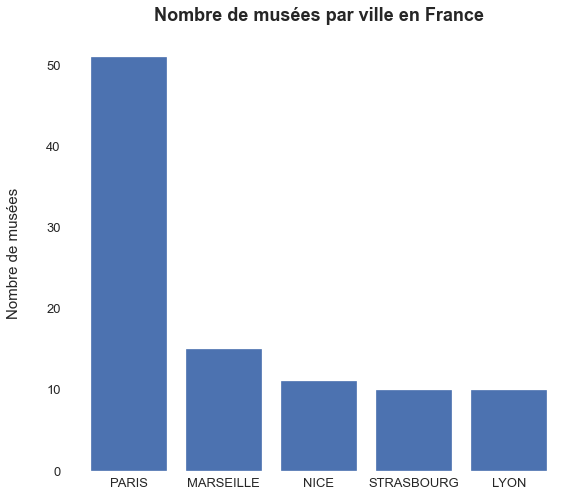

In [21]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_ylabel(
    ylabel="Nombre de musées",
    fontsize=15,
    labelpad=25) # On modifie le padding du label des ordonnées
ax.set_title(
    label="Nombre de musées par ville en France",
    fontsize=18,
    fontweight="bold",
    pad=15); # On modifie le padding du titre du graphique

On pourrait peut-être encore améliorer les choses en plaçant le texte à l'horizontale et en jouant à nouveau avec ses coordonnées.

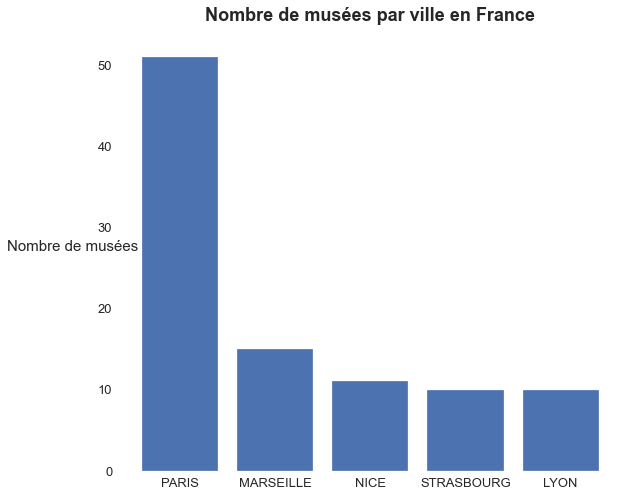

In [22]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_ylabel(
    ylabel="Nombre de musées",
    fontsize=15,
    labelpad=25,
    rotation=0 # On modifie l'axe d'affichage du label des ordonnées
    )
ax.set_title(
    label="Nombre de musées par ville en France",
    fontsize=18,
    fontweight="bold",
    pad=15);

C'est bien, mais à présent, il faudrait pouvoir replacer la légende de l'axe des ordonnées.

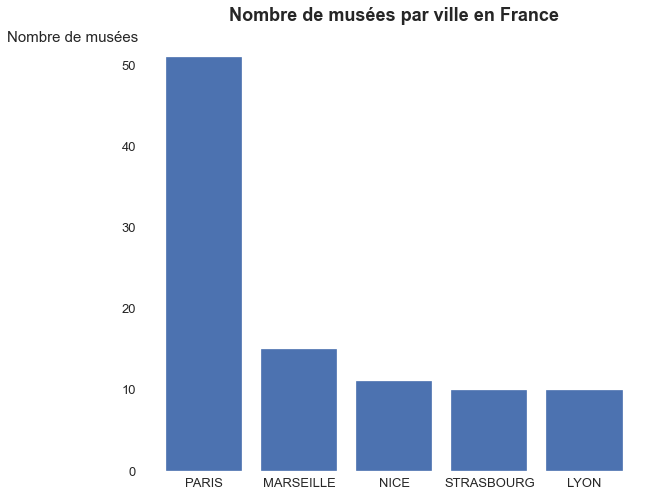

In [23]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_ylabel(
    ylabel="Nombre de musées",
    fontsize=15,
    labelpad=25,
    rotation=0
    )
ax.yaxis.set_label_coords(-0.14, 0.98) # On ajuste manuelle les coordonnées du label des ordonnées
ax.set_title(
    label="Nombre de musées par ville en France",
    fontsize=18,
    fontweight="bold",
    pad=15);

Si on fait ce choix, il paraît judicieux de placer le titre sous le graphique pour ne pas brouiller la lecture.

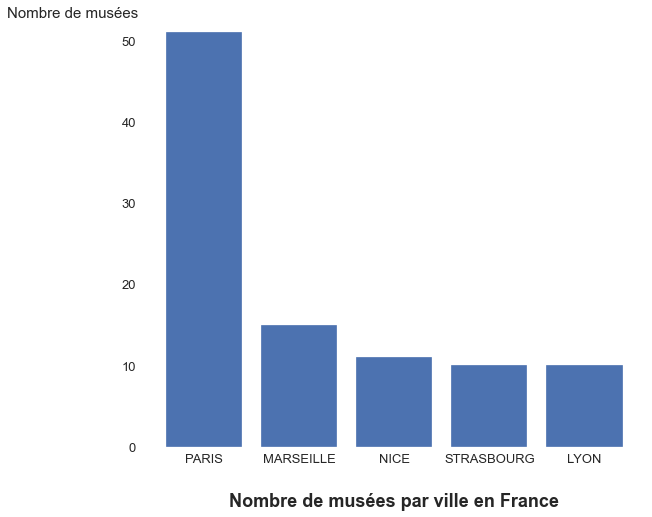

In [24]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_ylabel(
    ylabel="Nombre de musées",
    fontsize=15,
    labelpad=25,
    rotation=0
    )
ax.yaxis.set_label_coords(-0.14, 0.98)
ax.set_title(
    label="Nombre de musées par ville en France",
    fontsize=18,
    fontweight="bold",
    y=-0.15); # On déplace le titre en bas du graphique

Pour aller plus loin, on peut tenter de reconstruire la légende de notre axe des ordonnées et faire apparaître directement les valeurs correspondantes à chaque ville sur le graphique.

In [25]:
# On définit une fonction pour annoter chaque bâton avec la valeur correspondante à chaque ville
def label_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2.65,
            height,
            horizontalalignment="center",
            fontsize=14,
            color="white",
            fontweight="bold"
        )

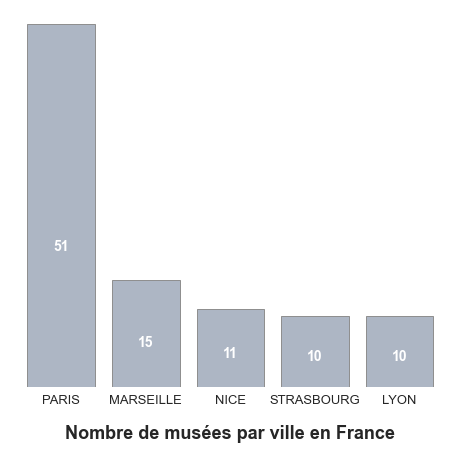

In [26]:
fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.bar(
    x=nom_musees_ville,
    height=nb_musees_ville,
    **{
        "fill": True,
        "edgecolor": "#8C8C8C",
        "facecolor": "#ADB6C4",
        "linewidth": 0.95
      })
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.get_yaxis().set_ticks([])
ax.set_title(
    label="Nombre de musées par ville en France",
    fontsize=18,
    fontweight="bold",
    y=-0.15);

label_bars(bars)

#### 5. 2. 3. Adapter nos graphiques aux supports

On peut maintenant s'attaquer au problème de résolution de nos éléments de texte de légende de notre graphique. Là encore, les paramètres par défaut de la bibliothèque `Matplotlib` produisent des graphiques au format image (`.png`) alors qu'il serait plus agréable de pouvoir obtenir une sortie au format vectoriel afin que les éléments à afficher s'adaptent à la taille de l'écran de chacune et chacun.

S'il s'agirait simplement d'explorer rapidement et graphiquement des données pour prototyper un travail d'analyse ou visualiser certains aspects d'un jeu de données, il peut être intéressant de conserver un format de sortie image car il sera plus léger lorsqu'on souhaitera produire des graphiques plus riches (plus une image est complexe, plus elle a d'éléments à afficher et plus un fichier vectoriel sera lourd car il devra décrire cette complexité et tous les points à afficher).

Pour cela, il faut s'attaquer aux paramètres du module `IPython` qui supporte **Jupyter**.

In [27]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

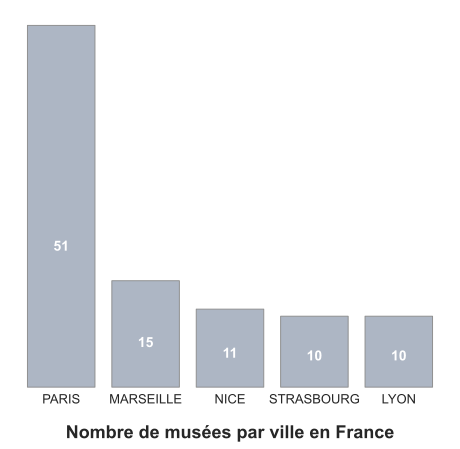

In [28]:
fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.bar(
    x=nom_musees_ville,
    height=nb_musees_ville,
    **{
        "fill": True,
        "edgecolor": "#8C8C8C",
        "facecolor": "#ADB6C4",
        "linewidth": 0.95
      })
ax.grid()
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=13)
ax.get_yaxis().set_ticks([])
ax.set_title(
    label="Nombre de musées par ville en France",
    fontsize=18,
    fontweight="bold",
    y=-0.15);

label_bars(bars)

### 5. 3. Documentation

On trouvera toute la documentation nécessaire sur la bibliothèque `Matplotlib` à [cette adresse](https://matplotlib.org/stable/api/index.html) et une série de [tutoriels](https://matplotlib.org/stable/tutorials/index.html).

### 5. 4. En somme

* La bibliothèque standard pour la visualisation de données en Python
* Simple de prise en main pour produire des graphiques "premier jet" pour un travail exploratoire
* Plus complexe à exploiter pour réaliser des graphiques de qualité
* Néanmoins, il est tout à fait possible de produire des graphiques de très bonne qualité grâce à elle
* Hautement paramétrable si on accepte de prendre le temps d'explorer au-delà des valeurs par défaut

## 6. Produire ses graphiques via D3.js en Python : Altair

### 6. 1. Présentation de l'outil

`Altair` est une bibliothèque de visualisation de données basée sur la **philosophie déclarative de Vega (*visualization grammar*)** que l'on peut facilement traduire sous la forme d'un **fichier JSON**.

**Vega**, et donc par extension `Altair`, s'appuie sur **D3.js**, une bibliothèque **JavaScript** également dédiée à la visualisation de données sous la forme d'objets vectoriels (au format SVG). Son objectif est d'offrir à la fois un outil de haut niveau pour produire rapidement des graphiques, mais également de permettre d'en ouvrir les entrailles et de pouvoir hautement personnaliser leur comportement et leur rendu.

Comme `Altair` s'appuie sur **JavaScript**, elle permet de produire des graphiques interactifs et adaptés au web.

### 6. 2. La philosophie sous-jacente de l'outil à travers un exemple

#### 6. 2. 1. Les données comme tableau *pandas*

Avec `Altair`, l'idée est de déclarer des liens entre les **colonnes d'un tableau représentant les données** et **les variables visuelles qui vont les représenter**.

Pour représenter les données, `Altair` s'appuie sur le format de `pandas` qui n'est rien d'autre qu'un dictionnaire contenant des listes représentant chaque colonne.

In [29]:
import pandas as pd

tableau_pandas = pd.DataFrame({
    "col1": ["ligne1", "ligne2", "ligne3"],
    "col2": ["ligne1", "ligne2", "ligne3"]
})

tableau_pandas

,col1,col2
0,ligne1,ligne1
1,ligne2,ligne2
2,ligne3,ligne3


#### 6. 2. 2. Un peu de nettoyage de données

Nous allons rapidement transformer les données de fréquentation des musées en France pour afficher le total des fréquentations par année. Pour cela, on utiliser la fonction `.groupby` de `pandas` qui permet de regrouper l'ensemble des données associées à une catégorie spécifique du jeu de données : une fois regroupées, on peut appliquer des transformations sur ces groupes (notamment faire la somme des fréquentations, ce qui nous intéresse dans ce cas précis).

In [30]:
# Simplifions d'abord le jeu de données originel pour ne retenir que ce qui nous intéresse
df_freq_simp = df_freq.drop(columns=["ref_musee", "nom_du_musee"])
df_freq_simp.head()

,annee,payant,gratuit,total
0,2009,789.0,3683.0,4472.0
1,2009,2613.0,669.0,3282.0
2,2009,2608.0,3139.0,5747.0
3,2009,0.0,2014.0,2014.0
4,2009,0.0,2600.0,2600.0


In [31]:
# Ensuite, on applique la méthode .groupby et on calcule la somme des fréquentations
df_freq_annee = df_freq_simp.groupby(["annee"]).sum()
df_freq_annee.head()

,payant,gratuit,total
annee,,,
2001,28466349.0,10382830.0,38849179.0
2002,29953221.0,12416890.0,42370111.0
2003,27012323.0,13311906.0,40324229.0
2004,32223957.0,13406772.0,45630729.0
2005,30315726.0,14933647.0,45249373.0


Il faut s'arrêter à présent une seconde pour détailler une petite subtilité dans le fonctionnement d'`Altair`. Nous allons voir dans les points suivants que la bibliothèque n'est pas capable de reconnaître la colonne `index` d'un tableau de données `pandas`. Pour cela, il nous faut donc sortir les données qui sont contenus dans l'`index` pour les stocker dans une colonne dédiée. Avec `pandas`, c'est assez simple, on peut appeler la méthode `.reset_index()`.

In [32]:
# On extrait les données de l'index pour en faire une colonne dédiée
df_freq_annee.reset_index(inplace=True)
df_freq_annee.head()

,annee,payant,gratuit,total
0,2001,28466349.0,10382830.0,38849179.0
1,2002,29953221.0,12416890.0,42370111.0
2,2003,27012323.0,13311906.0,40324229.0
3,2004,32223957.0,13406772.0,45630729.0
4,2005,30315726.0,14933647.0,45249373.0


#### 6. 2. 3. L'objet Chart

Une fois que l'on a construit notre jeu de données au format `pandas`, on peut appeler l'objet `Chart` d'`Altair`. C'est sur cet objet que l'on appelle ensuite toutes les méthodes qui permettent de paramétrer la façon dont les données vont être affichées.

In [33]:
import altair as alt

In [34]:
chart = alt.Chart(df_freq_annee)

Dans la philosophie d'`Altair`, en suivant une **approche fonctionnelle** propre à la technologie D3.js sous-jacente, l'objet `Chart` peut être vu comme une fonction à laquelle on se contente simplement de passer notre jeu de données.

Néanmoins, si on souhaite suivre une **approche orientée objet**, on peut voir l'objet `Chart` comme un **constructeur** auquel on peut passer les paramètres qui permettent de détailler la façon dont les données doivent être transformées en **variables visuelles**.

Dans la suite de notre exploration d'`Altair`, nous suivrons la première méthode.

#### 6. 2. 4. L'attribut mark

Lorsqu'on construit un graphique avec `Altair`, il s'agit de spécifier le type de **marqueur** que l'on souhaite utiliser pour **donner former à nos données**.

Dans notre cas, nous voulons tout d'abord construire un **diagramme en bâtons** : pour cela, on peut appeler la méthode `.mark_bar()`. On peut visualiser directement le rendu graphique du **marquer des données** (de la façon dont les données vont être matérialisées sur notre graphique) même si on ne détaille aucune donnée spécifique outre le jeu de données que l'on a passé au préalable à l'objet `Chart`.

In [35]:
alt.Chart(df_freq_annee).mark_bar()

alt.Chart(...)

Il existe différents types de **marqueurs de données** prédéfinis dans `Altair`. On peut retrouver une liste les détaillant [ici](https://altair-viz.github.io/user_guide/marks.html).

#### 6. 2. 5. L'attribut encoding

A présent, il s'agit de lier les **ensembles de données** de notre jeu de données à des **variables visuelles** sous la forme desquels ils seront traduits par `Altair`. C'est le rôle de la méthode `.encode()`.

Repartons de notre exemple précédent : nous souhaitons réaliser un **diagramme en bâtons** qui représentera le nombre d'entrées totales dans tous les musées de France par année.

Les **deux principaux arguments** de la méthode `.encode()` sont, en toute logique :
* `x` qui définit la colonne de données à représenter sur l'axe des abscisses
* `y` qui définit la colonne de données à représenter sur l'axe des ordonnées

In [36]:
alt.Chart(df_freq_annee).mark_bar().encode(
    x="annee",
    y="total"
)

alt.Chart(...)

A cela s'ajoute d'autres arguments qui vont jouer, visuellement, sur certains aspects comme le **gradient de couleur**, la **forme des marqueurs de données**, etc.

Dans notre cas, nous allons utiliser un gradient de couleur pour visualiser la part des entrées payantes dans le total des entrées : pour cela, on ajoute l'argument `color` à notre méthode `.encode()`, auquel on associe la colonne qui contient les données sur le nombre d'entrées payantes.

In [37]:
alt.Chart(df_freq_annee).mark_bar().encode(
    x="annee",
    y="total",
    color="payant"
)

alt.Chart(...)

#### 6. 2. 6. Altair s'appuie sur le format et le type des données

`Altair` est capable d'induire le **type des données** et également en fonction de leur **format**, peut opérer des choix pour sélectionner la représentation la plus appropriée pour leur donner forme. Cet avantage nécessite néanmoins de comprendre la façon dont on peut **mettre en forme et en ordre** des données afin d'en tirer le meilleur parti.

En suivant l'exemple que nous explorons sur la fréquentation des musées, on souhaiterait pouvoir construire un **graphique par surfaces** qui superposerait les entrées payantes et les entrées gratuites afin d'analyser leur évolution parallèle. Mais pour cela, compte tenu de la façon dont nos données sont construites, il nous faut au préalable les transformer pour permettre à `Altair` d'appliquer ses opérations de mise en forme automatiques.

Il existe mille et une façons de représenter des données. Néanmoins, dans la logique de `pandas`, on peut distinguer ce que l'on nomme les données ***long-form*** et les ***wide-form*** :
* Les ***long-form*** ont un nombre de lignes multiplié par le nombre de variables auquel se rapporte une observation spécifique 
* Les ***wide-form*** ont une colonne par variable avec le label décrivant les donnée se situant dans l'entête de la colonne

In [38]:
long_form = pd.DataFrame({
    "annee": [2001, 2002, 2003, 2001, 2002, 2003],
    "type_entree": ["payant", "payant", "payant", "gratuit", "gratuit", "gratuit"],
    "nombre_entree": [103, 134, 145, 139, 167, 230]
})
long_form

,annee,type_entree,nombre_entree
0,2001,payant,103
1,2002,payant,134
2,2003,payant,145
3,2001,gratuit,139
4,2002,gratuit,167
5,2003,gratuit,230


In [39]:
wide_form = pd.DataFrame({
    "annee": [2001, 2002, 2003],
    "payant": [103, 134, 145],
    "gratuit": [139, 167, 230]
})
wide_form

,annee,payant,gratuit
0,2001,103,139
1,2002,134,167
2,2003,145,230


Pour transformer nos données qui sont représentées dans un format ***wide-form*** en une représentation ***long-form*** sur laquelle on souhaite s'appuyer pour tirer partie des options de mises en forme automatiques d'`Altair`, on peut utiliser la méthode `.melt()` de `pandas`. L'idée est de lui spécifier la liste des colonnes que l'on souhaite faire passer en ligne en les passant à l'argument `value_vars` ; à cela, on ajoute l'argument `id_vars` qui fait office de "pivot" si l'on peut dire (il s'agit de la colonne qui sera dupliquée pour permettre d'ajouter autant de lignes que l'on aura de catégories différentes à passer à l'argument `value_vars`).

In [40]:
# On passe les colonnes "payant" et "gratuit" à l'argument "value_vars" pour effectuer le pivot
df_long_freq_annee = df_freq_annee.melt(
    id_vars=["annee"],
    value_vars=["payant", "gratuit"],
    var_name="type_entree",
    value_name="nombre_entree")
df_long_freq_annee.head()

,annee,type_entree,nombre_entree
0,2001,payant,28466349.0
1,2002,payant,29953221.0
2,2003,payant,27012323.0
3,2004,payant,32223957.0
4,2005,payant,30315726.0


In [48]:
# On peut maintenant s'appuyer sur le type de données, gratuit ou payant, pour chaque ligne "annee" de
# notre jeu de données
alt.Chart(df_long_freq_annee).mark_area().encode(
    x="annee",
    y="nombre_entree",
    color="type_entree"
)

alt.Chart(...)

A cela, il faut également ajouter qu'`Altair` permet d'ajouter une information sur le **type de données** de façon très efficace. On peut retrouver à [cette adresse](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types) la liste de tous les types de données que l'on peut appliquer sur des jeux de données à l'aide d'`Altair`.

En pratique, le plus simple est de faire suivre le nom de la colonne du tableau de données par `:` suivi d'une lettre décrivant le **type de données**.

Actuellement, la colonne `annee` de notre tableau de données `pandas` est au format numérique (`float` plus exactement, qui permet de décrire le nombres décimaux). Dans notre cas, il s'agit plutôt d'une **variable ordinale**, c'est-à-dire, d'une **variable catégorielle** pour laquelle l'ordre a une certaine importance.

Pour cela, on peut simplement ajouter le suffixe `:O` à notre nom de colonne que l'on passe en argument de la méthode `.encode()`.

In [54]:
# On ajoute le suffixe ":O" à la colonne "annee" pour indiquer qu'il s'agit d'une variable catégorielle
# ordinale et nom d'un type de données numérique
alt.Chart(df_long_freq_annee).mark_area().encode(
    x="annee:O",
    y="nombre_entree:Q",
    color="type_entree:N"
)

alt.Chart(...)

On peut constater qu'`Altair` transforme par la même occasion le format d'affichage en l'adaptant au **type de données** que l'on a renseigné.

#### 6. 2. 7. Finaliser le graphique en explorant d'autres paramètres d'Altair

Tentons ici de finaliser notre graphique et explorons pour cela d'autres paramètres d'`Altair` que l'on peut modifier afin de personnaliser le rendu final en gardant en tête les questions que nous avons énoncées plus tôt comme prismes utiles pour produire des graphiques pertinents.

Par défaut, `Altair` utilise les noms des colonnes de notre jeu de données pour produire les légendes : les *underscores* ne sont pas super à la lecture et l'idéal serait de pouvoir les supprimer. Au passage, on pourra aussi ajouter un titre à notre graphique.

Pour modifier plus en détail certains paramètres, il nous faut passer directement les objets représentant chaque **encodeur** faisant le lien entre l'ensemble de notre jeu de données et le paramètre visuel auquel il se rapporte. De façon générale, il s'agit simplement d'appeler directement sur l'objet `Altair` la méthode qui porte généralement le même nom que le paramètre que l'on passait au préalable à la méthode `.encode()`.

Ainsi, pour représenter le paramètre `x` ou `y`, on peut appeler la méthode `.X()` et `.Y()` qui représentent respectivement l'**encodeur** de l'axe des abscisses et de celui des ordonnées. Toujours dans la logique de l'**approche fonctionnelle** d'`Altair`, on peut passer des paramètres à ces méthodes qui peuvent, à leur tour, prendre de nouvelles fonctions en paramètres.

In [55]:
# On appelle les méthodes propres à chaque encodeur auxquelles on passe le paramètre "title" pour
# modifier le titre des légendes de chaque axe
alt.Chart(df_long_freq_annee).mark_area().encode(
    alt.X(
        shorthand="annee:O",
        title="Année"
    ),
    alt.Y(
        shorthand="nombre_entree:Q",
        title="Nombre d'entrées"
    ),
    alt.Color(
        shorthand="type_entree:N",
        title="Type d'entrées"
    )
)

alt.Chart(...)

En suivant la même logique, intervenons maintenant sur l'objet `Chart` en lui-même pour lui associer un titre. On utilise pour cela la méthode `.configure_title()` à laquelle on peut passer différents paramètres.

In [56]:
# On ajoute la méthode "properties" à laquelle on passe le titre du graphique comme paramètre mais
# également la méthode "configure_title" qui permet de paramétrer l'affichage du titre
alt.Chart(df_long_freq_annee).mark_area().encode(
    alt.X(
        shorthand="annee:O",
        title="Année"
    ),
    alt.Y(
        shorthand="nombre_entree:Q",
        title="Nombre d'entrées"
    ),
    alt.Color(
        shorthand="type_entree:N",
        title="Type d'entrées"
    )
).properties(
    title="Fréquentation des musées en France (2001-2019)"
).configure_title(
    fontSize=16,
    font="Arial",
    color="black",
    align="center",
    orient="bottom",
    offset=15
)

alt.Chart(...)

Par défaut, `Altair` impose une marge latérale : c'est une question de goût et, éventuellement, de lisibilité, mais prenons ici le parti de retirer cette marge. Pour cela, on peut paramétrer l'objet `Scale` d'`Altair` que l'on peut passer en paramètre de notre objet `.X()` représentant l'**encodeur** pour l'axe des abscisses.

In [57]:
# On ajoute le paramètre "scale" auquel on passe l'objet "Scale" d'Altair, auquel on passe à son tour
# une valeur numérique au paramètre "padding" qui permet de définir la marge latérale de l'axe
alt.Chart(df_long_freq_annee).mark_area().encode(
    alt.X(
        shorthand="annee:O",
        title="Année",
        scale=alt.Scale(padding=0)
    ),
    alt.Y(
        shorthand="nombre_entree:Q",
        title="Nombre d'entrées"
    ),
    alt.Color(
        shorthand="type_entree:N",
        title="Type d'entrées"
    )
).properties(
    title="Fréquentation des musées en France (2001-2019)"
).configure_title(
    fontSize=16,
    font="Arial",
    color="black",
    align="center",
    orient="bottom",
    offset=15
)

alt.Chart(...)

Pour finaliser le graphique, retirons la grille de repère qui marque chaque point de repère de l'axe des ordonnées. Et enfin, modifions les paramètres d'affichage du graphique pour l'aggrandir.

In [58]:
# On ajoute la méthode ".configure_axis()" pour supprimer l'affichage de la grille d'échelle ainsi que la
# méthode ".properties()" qui permet notamment de paramétrer la taille d'affichage du graphique
alt.Chart(df_long_freq_annee).mark_area().encode(
    alt.X(
        shorthand="annee:O",
        title="Année",
        scale=alt.Scale(padding=0)
    ),
    alt.Y(
        shorthand="nombre_entree:Q",
        title="Nombre d'entrées"
    ),
    alt.Color(
        shorthand="type_entree:N",
        title="Type d'entrées"
    )
).properties(
    title="Fréquentation des musées en France (2001-2019)"
).configure_title(
    fontSize=16,
    font="Arial",
    color="black",
    align="center",
    orient="bottom",
    offset=15
)

alt.Chart(...)

### 6. 3. Construire des graphiques interactifs pour le web

La force d'`Altair`, notamment du fait de son ancrage dans la technologie D3.js, est de permettre d'ajouter des éléments d'**interactivité**, rendant les graphiques produits grâce à cette bibliothèque particulièrement adaptés à leur publication sur le web.

De la même façon que les aspects visuels, les **éléments d'interactivité** suivent la même **logique fonctionnelle et déclarative** d'`Altair`. Pour ce qui concerne l'interactivité, elle s'appuie sur trois éléments (qui s'appelent tous sur l'objet `Chart`) :
* La méthode `.selection()` qui capture l'interaction de l'utilisat.eur.rice avec la souris
* La méthode `.condition()` qui permet de définir, associé à une `selection` en entrée, des modifications à afficher sur le graphique
* La propriété `.bind` qui permet de définir un lien à double sens entre une `selection` et des éléments d'entrée du graphique

#### 6. 3. 1. Préparation des données

Dans ce nouvel exemple, nous allons créer un graphique interactif pour visualiser la fréquentation des musées par région. Pour cela, il nous faut effectuer une jointure entre les jeux de données `df_musees` et `df_freq` : on aura besoin d'une colonne contenant des valeurs communes pour cela, celles-ci permettant de faire correspondre chaque ligne de chaque jeu de données à celles de l'autre.

Comme les musées n'ont pas le même âge et le même temps d'existence, certains disposent de données enregistrées pour toutes les années de 2009 à 2019, mais ce n'est pas le cas de tous. Ainsi, il nous faudra faire attention à faire une ***outer* jointure**, de telle sorte à ce que les musées pour lesquels il y a plusieurs années soient bel et bien pris en compte également.

En faisant rapidement un `.groupby()` sur notre jeu de données qui contient les informations sur les fréquentations, on peut voir cela assez facilement. Ainsi, pour le musée qui a la référence `0105301`, on voit bien qu'il existe des données sur plusieurs années, ce qui n'est pas forcément le cas de tous les musées.

Avant d'aller plus loin, commençons par définir la colonne `ref_musee` comme l'index de chacun des deux tableaux de données pour simplifier les opérations de jointure.

In [ ]:
df_musees.set_index("ref_musee", inplace=True)
df_freq.set_index("ref_musee", inplace=True)

Maintenant que l'on a bien pris en compte ce paramètre, on peut préciser dans notre **jointure** que l'on souhaite qu'elle soit bien une ***outer* jointure**.

In [ ]:
df_join = pd.merge(
    left=df_freq,
    right=df_musees,
    left_index=True,
    right_index=True
)
df_join.head()

On peut s'assurer de ne pas avoir perdu de données en cours de route en vérifiant qu'il y a bel et bien plusieurs entrées pour un même musée dans notre nouveau jeu de données lié.

In [ ]:
df_join.index.value_counts().head()

In [ ]:
df_join.columns

A présent, on peut nettoyer le jeu de données pour sélectionner uniquement les colonnes qui nous intéressent.

In [ ]:
df_join.drop(columns=[
    "nom_du_musee_x",
    "nom_du_musee_y",
    "adr",
    "ville",
    "sitweb",
    "departement",
    "coordonnees_finales"
], inplace=True)
df_join.head()

Maintenant, effectuons une opération pour grouper les musées et faire une somme des valeurs d'entrées enregistrées par région pour chaque année.

In [ ]:
df_region_annee = df_join.groupby(["region", "annee"]).sum()
df_region_annee.head()

Comme `Altair` n'est pas capable de travailler à partir des valeurs stockées dans les index des tableaux de données `pandas`, on applique la méthode `.reset_index()` pour attribuer des colonnes à chaque variable.

In [ ]:
df_region_annee.reset_index(inplace=True)
df_region_annee.head()

#### 6. 3. 2. Ajouter de l'interactivité

Il y a différentes façons d'ajouter des éléments d'**interactivité** avec `Altair`. Dans notre exemple, on souhaiterait pouvoir afficher les valeurs de fréquentation des musées par région à l'aide d'un **menu déroulant** qui permettrait de sélectionner la région qui nous intéresse.

La premier élément que l'on peut définir est celui qui permet de lier la **liste des régions** et le bouton de défilement à partir duquel on pourra sélectionner la valeur que l'on souhaite.

In [ ]:
bouton_selection = alt.binding_select(
    options=df_region_annee["region"].unique(),
    name="Région"
)

Ensuite, il s'agit de créer l'interface de **sélection** qui fait le lien entre les colonnes concernées dans le jeu de données et le bouton.

In [ ]:
selection = alt.selection_single(
    fields=['region'],
    bind=bouton_selection,
    empty='none'
)

Enfin, on définit une **condition** qui définit deux situations différentes entraînant une modification des variables visuelles sur le graphique : lorsque la condition est fausse et lorsqu'elle est vraie.

In [ ]:
opacity = alt.condition(
    predicate=selection,
    if_true=alt.Opacity(
        shorthand="region:N",
        legend=None
    ),
    if_false=alt.value(0.0)
)

La dernière étape consiste à ajouter les éléments qui définissent l'aspect intéractif du graphique dans le graphique lui-même. Pour cela, on appelle la méthode `.add_selection()` à laquelle on passe en paramètre la fonction `selection` que l'on a définit plus tôt.

Dans la méthode `.encode()`, on passe la **condition** en paramètre de la variable visuelle sur laquelle on veut que l'interaction agisse.

In [ ]:
alt.Chart(df_region_annee).mark_line().encode(
    x=alt.X(
        shorthand="annee:O",
        title="Année"
    ),
    y=alt.Y(
        shorthand="total:Q",
        title="Nombre total d'entrées"
    ),
    opacity=opacity
).add_selection(
    selection
).properties(
    title="Fréquentation des musées en France par région (2001-2019)",
    width=650,
    height=300
).configure_title(
    fontSize=16,
    font="Arial",
    color="black",
    align="center",
    orient="bottom",
    offset=15
)

### 6. 4. Documentation

On peut retrouver la documentation de la bibliothèque Altair à [cette adresse](https://altair-viz.github.io/). L'onglet de [guide d'utilisation](https://altair-viz.github.io/user_guide/data.html) de la documentation est particulièrement utile et permet de bien saisir la décomposition des éléments entre les méthodes `.mark()`, `.encoding()` en particulier qui animent tout le coeur du travail de représentation des données. 

### 6. 5. En résumé

* Une bibliothèque basée sur une approche fonctionnelle qui permet 
* La possibilité de réaliser des graphiques interactifs assez facilement
* Avec néanmoins des limites dans les types possibles d'interactions que l'on peut mettre en place (on en peut pas, par exemple, charger des données dynamiquement)
* Une syntaxe assez simple et claire
* Une assez bonne documentation (en dehors des éléments liés à la partie interactive des graphiques et de la référence de l'API qui est plutôt indigeste et pas très simple à explorer)
* La grammaire descriptive Vega qui permet d'exporter chaque graphique que l'on produit au format JSON (et que l'on peut donc ouvrir dans d'autres outils, notamment à l'aide de JavaScript pour construire des représentations graphiques pour le web)
* L'intégration des possibilités d'interaction directement dans les notebooks Jupyter

## 7. L'environnement de visualisation de données tout en un : Plotly

### 7. 1. Présentation de Plotly et de son environnement technique

`Plotly` est à la fois le nom d'une bibliothèque de visualisation de données et celui du projet qui l'entoure qui vise, plus largement, à développer des environnements de travail pour faciliter toute une série d'actions routinières encadrant les activités qui touchent à la "science des données".

Ainsi, `Plotly` (la bibliothèque de visualisation de données) s'inscrit dans un environnement technique qui tend à rapprocher nombre d'outils ou de besoins récurrents dans les communautés intéressées à la "science des données". Par exemple, on retrouve la bibliothèque `Plotly` dans de multiples langages et environnements de travail orientés vers les mathématiques et l'analyse de données comme **Python**, **Matlab**, **R**, **Julia**.

Associé à `Dash`, `Plotly` permet de produire rapidement des **tableaux de bord** pour résumer un ensemble de données visualisées de différentes manières.

### 7. 2. Prise en main de l'outil

ok

### 7. 3. Produire un tableau de bord avec Plotly et Dash

ok

## 8. Représentations cartographiques avec geoplot

### 8. 1. Produire des cartes avec le socle de Matplotlib

`geoplot` est une bibliothèque qui s'appuie sur le socle de `Matplotlib` pour permettre de produire facilement des **représentations cartographiques courantes**. En effet, comme toutes les bibliothèques de **haut niveau**, `geoplot` a :
* A la fois l'avantage de permettre de produire rapidement un résultat à partir de données bien formées
* Mais également l'inconvénient de permettre seulement de construire des graphiques très normés, qui répondent aux "grands standards" des représentations cartographiques

#### 8. 1. 1. Préparer les données pour la représentation cartographique

Produire une représentation cartographique nécessite :
* D'ajouter aux données quantitatives, des données géographiques qui décrivent un ensemble de mesures de positions à la surface du globe (en fonction d'un référentiel donné)
* De transformer les données géographiques et quantitatives de telles sortes à ce qu'elles soient adaptées à la représentation cartographique

La première chose que l'on souhaite faire est d'extraire les **coordonnées latitude-longitude** de notre jeu de données descriptif des musées. Ces informations sont contenues dans la colonne `coordonnes_finales` que l'on peut séparer sur la base du caractère `,` qui va nous permettre d'appeler la méthode `.split()` de `pandas`.

In [ ]:
import geopandas as gpd
import mapclassify as mc
import geoplot as gplt

In [ ]:
df_coords = df_musees["coordonnees_finales"].str.split(",", expand=True)
df_coords.head()

On peut renommer rapidement les nouvelles colonnes crées avant de les insérer dans le jeu de données originel.

In [ ]:
# On renomme simplement les colonnes sur la base de leur nom préalable
df_coords.rename({0: "latitude", 1: "longitude"}, axis="columns", inplace=True)
df_coords.head()

Maintenant que l'on a extrait les **coordonnées latitude-longitude** dans des colonnes indépendantes, on peut fusionner ce nouveau tableau avec le précédent et procéder à un peu de nettoyage...

In [ ]:
df_coords_musees = df_musees.merge(
    df_coords,
    left_on=df_musees.index,
    right_on=df_coords.index
)
df_coords_musees.head(2)

Pour alléger la représentation cartographique, on fait ici le choix de retirer tous les musées qui ne sont pas en France métropolitaine. On peut afficher toutes les différentes régions et sélectionner celles que l'on veut retirer de notre représentation.

In [ ]:
df_coords_musees["region"].unique()

In [ ]:
df_coords_musees = df_coords_musees[~df_coords_musees["region"].isin([
    "LA REUNION",
    "MARTINIQUE",
    "GUADELOUPE",
    "GUYANE",
    "SAINT-PIERRE ET MIQUELON"
])]

Et on supprime rapidement les colonnes qui ne nous intéressent pas.

In [ ]:
df_coords_musees.drop(columns=[
    "adr",
    "ville",
    "sitweb",
    "region",
    "departement",
    "coordonnees_finales"
], inplace=True)
df_coords_musees.head(2)

On renomme la colonne contenant le numéro de référence de chaque musée et on repasse ladite colonne `ref_musee` en index de notre nouveau tableau.

In [ ]:
df_coords_musees.rename({"key_0": "ref_musee"}, axis="columns", inplace=True)
df_coords_musees.set_index("ref_musee", inplace=True)
df_coords_musees.head()

Maintenant que nous avons des données propres, on peut utiliser la bibliothèque `geopandas` pour transformer les **coordonnées latitude-longitude** en des **données géographiques** qui seront exploitables par `geoplot`.

In [ ]:
gpd_musees_france = gpd.GeoDataFrame(
    data=df_coords_musees,
    geometry=gpd.points_from_xy(
        df_coords_musees["longitude"],
        df_coords_musees["latitude"]
    )
)
gpd_musees_france.head()

Maintenant que notre tableau de données est prêt à être visualisé, on peut charger un fond de carte qui nous permettra d'habiller la représentation graphique. `geopandas` est capable de lire les données géographiques au format `Shapefile`, on peut charger un tel fichier en appelant la méthode de `.read_file()` de `geopandas`.

In [ ]:
# On charge les données de fond de carte et on supprime d'emblée les régions que l'on a décidé d'écarter
# de notre représentation cartographique
gpd_regions = gpd.read_file("data/regions/regions-2018.shp")
gpd_regions.drop([0, 2, 7, 11, 13], inplace=True)

#### 8. 1. 2. Réaliser une carte de chaleur

`geoplot` dispose de différents types de représentations cartographiques prêts à l'emploi. Dans notre cas, nous choisirons de faire une représentation sous la forme de **carte de chaleur** : il s'agira de représenter par des contours de couleurs des zones où la densité des points est plus ou moins importante. La carte visualisera la densité de musées à l'échelle de la France métropolitaine.

Pour cela, on peut utiliser la méthode `.kdeplot()` de `geoplot` qui applique une méthode d'***estimation par noyau*** : il ne s'agit pas ici d'entrée dans le détail de la méthode, mais on peut se référer à [cette ressource](https://mathisonian.github.io/kde/).

On se reportera à la [documentation](https://mathisonian.github.io/kde/) de la méthode `.kdeplot()` pour explorer l'usage de ses différents paramètres en détail.

In [ ]:
gplt.kdeplot(
    df=gpd_musees_france,
    n_levels=150,
    cmap="Oranges",
    shade=True,
    clip=gpd_regions,
    figsize=(15, 10)
);
plt.title("Répartition des musées en France en 2019")

### 8. 3. En résumé

## 9.

In [ ]:
df_join = pd.merge(
    left=df_freq,
    right=df_musees,
    left_index=True,
    right_index=True
)
df_join.head()

In [ ]:
df_musees_met = df_join[~df_join["region"].isin([
    "GUADELOUPE",
    "MARTINIQUE",
    "GUYANE",
    "LA REUNION",
    "SAINT-PIERRE ET MIQUELON"
])]

In [ ]:
# On effectue la somme des entrées par année par musée
df_group_musee = df_musees_met.groupby([df_musees_met.index, "annee"]).sum().reset_index()
df_group_musee.head()

In [ ]:
df_split_coords = df_musees["coordonnees_finales"].str.split(",", expand=True)
df_split_coords.head()

In [ ]:
df_coords_group_musee = df_group_musee.merge(df_split_coords, left_on=df_group_musee["ref_musee"], right_on=df_split_coords.index)
df_coords_group_musee.head()

In [ ]:
gdf_coords_group_musee = gpd.GeoDataFrame(
    df_coords_group_musee,
    geometry=gpd.points_from_xy(
        df_coords_group_musee[1],
        df_coords_group_musee[0]
    )
)

In [ ]:
gdf_2019 = gdf_coords_group_musee[gdf_coords_group_musee["annee"] == 2019]
gdf_2019.head()

In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

In [ ]:
disc = mc.FisherJenks(gdf_2019["total"], k=5)

In [ ]:
gpd_regions = gpd.read_file("data/regions/regions-2018.shp")
gpd_regions.head()

In [ ]:
gpd_france_met = gpd_regions.drop([0, 2, 7, 11, 13])

In [ ]:
# ax = gplt.polyplot(gpd_france_met)
gplt.kdeplot(
    gdf_2019,
    n_levels=50,
    cmap="Oranges",
    shade=True,
    clip=gpd_france_met
)